<h1 align="center" style="color:brown;font-size:300%">Lab 4: Word Sense Disambiguation (WSD)</h1>


<div class="alert alert-block alert-info" >
<b style="font-size:150%">Question 1: <br><br>
a) Collect a small corpus of example sentences of varying lengths from any newspaper or magazine. Using WordNet or any standard dictionary, determine how many senses there are for each of the open-class words in each sentence.
</b>
</div>

In [27]:
# Importing necessary libraries
import requests  # For making HTTP requests to get web pages
from bs4 import BeautifulSoup  # For parsing HTML content
import nltk  # Natural Language Toolkit for NLP tasks
from nltk.corpus import wordnet  # WordNet is a lexical database for English
from nltk.tokenize import word_tokenize  # For splitting text into words
from nltk import pos_tag  # For part-of-speech tagging
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
# Downloading required NLTK data
# These are necessary for various NLP tasks we'll be doing
nltk.download('punkt')  # For tokenization
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')  # For accessing WordNet

[nltk_data] Downloading package punkt to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SOHAM CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


# Web Scraping and Natural Language Processing

<div class="alert alert-block alert-success">
This combines web scraping and natural language processing (NLP) techniques to analyze sentences from a news website.
</div>
 
1. Web Scraping: We use the `requests` library to fetch HTML content from a website and `BeautifulSoup` to parse it.
2. Tokenization: Breaking text into individual words or sentences.
3. Part-of-Speech (POS) Tagging: Identifying the grammatical parts of speech for each word.
4. WordNet: A lexical database that groups English words into sets of synonyms called synsets.

The goal is to extract sentences from a news article and analyze the number of word senses for each word using WordNet.


In [19]:
def scrape_news(url, num_sentences=5):
    # This function scrapes sentences from a given URL
    response = requests.get(url)  # Sending a GET request to the URL
    soup = BeautifulSoup(response.text, 'html.parser')  # Parsing the HTML content
    paragraphs = soup.find_all('p')  # Finding all paragraph tags
    
    sentences = []
    for p in paragraphs:
        # Tokenizing paragraph text into sentences and adding them to our list
        sentences.extend(nltk.sent_tokenize(p.text))
        if len(sentences) >= num_sentences:
            break  # Stop once we have enough sentences
    
    return sentences[:num_sentences]  # Return only the requested number of sentences

def get_pos(treebank_tag):
    # This function maps NLTK POS tags to WordNet POS tags
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None  # Return None for words that aren't open class (e.g., prepositions)

# Part-of-Speech Tagging

<div class="alert alert-block alert-success">
POS tagging is crucial for word sense disambiguation. Different parts of speech can have different meanings. For example:
</div>

- "bank" as a noun could mean a financial institution or the side of a river.
- "bank" as a verb could mean to rely on or to tilt.

By identifying the POS, we can more accurately determine the possible senses of a word in context.


In [20]:
def count_senses(sentence):
    # This function counts the number of senses for each word in a sentence
    words = word_tokenize(sentence)  # Splitting the sentence into words
    tagged_words = pos_tag(words)  # Tagging each word with its part of speech
    
    word_senses = {}
    for word, pos in tagged_words:
        wordnet_pos = get_pos(pos)  # Converting NLTK POS tag to WordNet POS tag
        if wordnet_pos:  # Only proceed if it's an open class word
            synsets = wordnet.synsets(word, pos=wordnet_pos)  # Getting all synsets for the word
            word_senses[word] = len(synsets)  # Storing the number of senses
    
    return word_senses


# Word Senses and WordNet

In linguistics, word sense refers to a specific meaning of a word. Many words have multiple senses (polysemy). WordNet organizes words into `synsets` (synonym sets), which represent distinct concepts.

For example, the word "java" might have synsets for:
1. A type of coffee
2. The Java programming language
3. An island in Indonesia

Counting these `synsets` gives us an idea of how many distinct meanings a word can have.


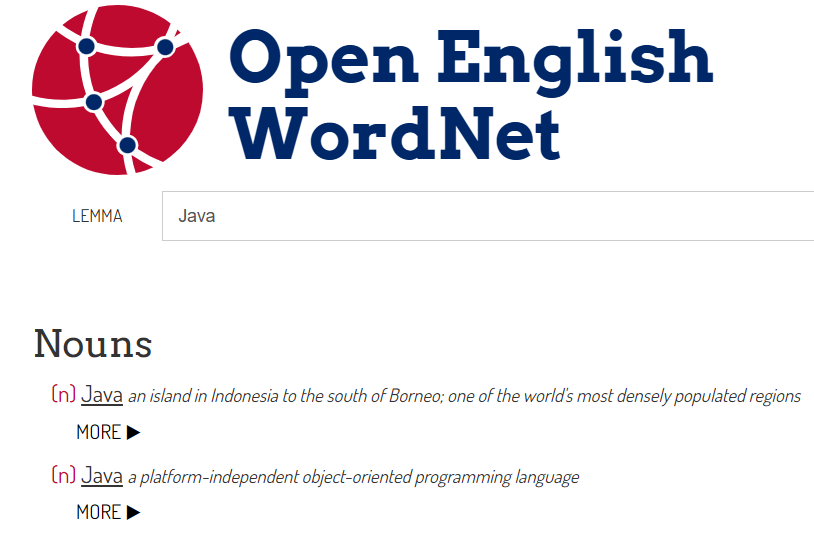

In [28]:
# Coming to the main usage
url = "https://www.ndtv.com/india"  # URL of a news website
no=int(input("How many news headlines do you want to analyse for word sense? "))
sentences = scrape_news(url,no)  # Getting sentences from the website

# Processing each sentence
for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}: {sentence}")
    senses = count_senses(sentence) 
    all_word_senses.append(senses)
    # Counting senses for each word and appending it to a list
    print("Word senses:")
    for word, num_senses in senses.items():
        print(f"  {word}: {num_senses}")

How many news headlines do you want to analyse for word sense? 5

Sentence 1: SpiceJet, for the second time in two years, has been placed under "enhanced surveillance" by the Directorate General of Civil Aviation following reports of cancelled flights and financial stress.
Word senses:
  SpiceJet: 0
  second: 2
  time: 10
  years: 7
  has: 19
  been: 13
  placed: 16
  enhanced: 1
  surveillance: 1
  Directorate: 1
  General: 3
  Civil: 0
  Aviation: 4
  following: 24
  reports: 7
  cancelled: 1
  flights: 9
  financial: 1
  stress: 5

Sentence 2: India commissioned its second nuclear submarine INS Arighaat today in Visakhapatnam.
Word senses:
  India: 1
  commissioned: 3
  second: 2
  nuclear: 4
  submarine: 2
  INS: 4
  Arighaat: 0
  today: 2
  Visakhapatnam: 0

Sentence 3: The Arihant-class submarine will strengthen India's nuclear triad, enhance nuclear deterrence, help in establishing strategic balance and peace in the region.
Word senses:
  Arihant-class: 0
  submarine: 2
  streng

<div class="alert alert-block alert-success">
<b> It's amazing how we can combine 
 web scraping and NLP to analyze real-world text.<br> I wonder how accurate 
 the sense counting is, given that context isn't considered. <br><br>Maybe that 
 could be an improvement for the future?</b>
</div>

# But let us not stop here...What if we visualized the results?

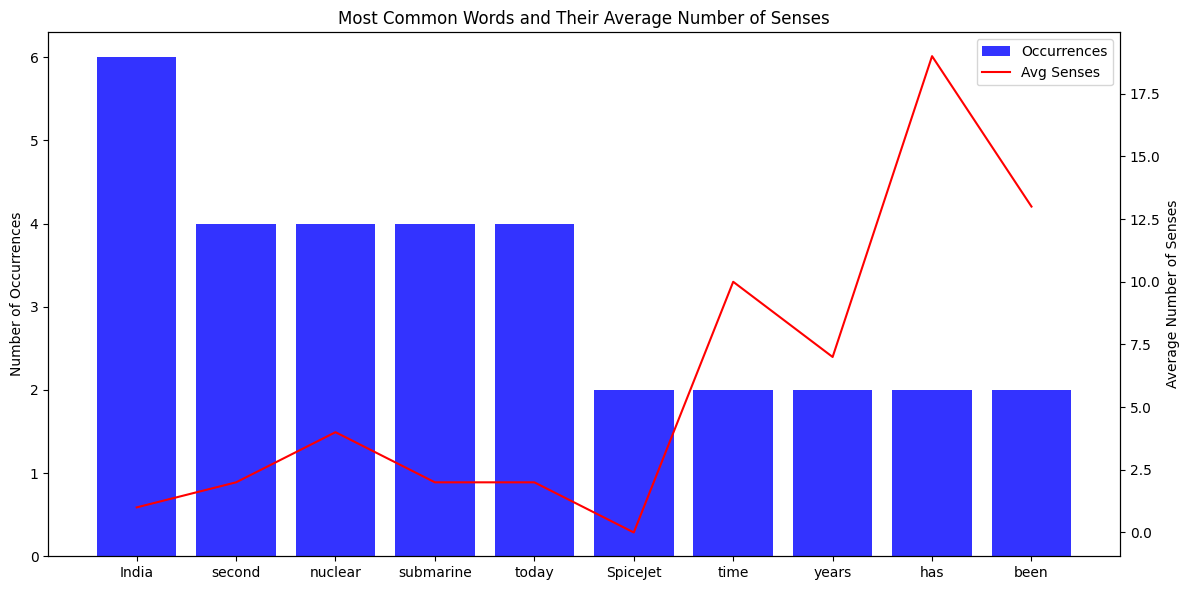

In [29]:
def visualise(all_ws):
    all_words = [item for sublist in all_ws for item in sublist.items()]
    
    c = Counter(word for word, _ in all_words)
    
    #  the 10 most common words
    most_common = c.most_common(10)
    
    words = [word for word, _ in most_common]
    counts = [count for _, count in most_common]
    
    # average number of senses for each word
    avg_senses = [sum(senses for w, senses in all_words if w == word) / count 
                  for word, count in most_common]

    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    ax1.bar(words, counts, alpha=0.8, color='b', label='Occurrences')
    ax1.set_ylabel('Number of Occurrences')
    ax1.set_title('Most Common Words and Their Average Number of Senses')
    
    ax2 = ax1.twinx()
    ax2.plot(words, avg_senses, 'r-', label='Avg Senses')
    ax2.set_ylabel('Average Number of Senses')
    
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


visualise(all_ws)

# What if we had multiple news sources ? 

## Multi-Source News Language Complexity Analyzer
#### This analyzes and compares the language complexity of articles from multiple news sources. It does this by:

- Scraping sentences from different news websites
- Analyzing the complexity of language used in each source by:

-  Counting word senses (using WordNet)
- - Calculating average word length


-  Comparing the results across different news sources
- - Visualizing the comparison using bar charts

In [36]:
# News sources
sources = {
    'NDTV': 'https://www.ndtv.com/india',
    'BBC': 'https://www.bbc.com/news/world',
    'Times of India': 'https://timesofindia.indiatimes.com/',
    'Al Jazeera': 'https://www.aljazeera.com/news/',
    'Indian Express': 'https://indianexpress.com/'
}

# Analyze sources
results = {}
num = int(input("How many news headlines to analyze per source? "))

for src, url in sources.items():
    print(f"\nAnalyzing {src}...")
    sents = scrape(url, num)
    results[src] = analyze(sents)
    
    print(f"Sample sentences from {src}:")
    for i, sent in enumerate(sents[:3], 1):
        print(f"  {i}. {sent}")
    
    print(f"Analysis for {src}:")
    for metric, val in results[src].items():
        print(f"  {metric}: {val:.2f}")

# Visualize results
metrics = ['avg_senses', 'avg_len']
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 5*len(metrics)))

for i, metric in enumerate(metrics):
    vals = [results[src][metric] for src in sources]
    axs[i].bar(sources.keys(), vals)
    axs[i].set_title(f'{metric.replace("_", " ").title()} by News Source')
    axs[i].set_ylabel('Value')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('news_comparison.png')
plt.close()

print("\nComparison of news sources:")
for metric in metrics:
    print(f"\n{metric.replace('_', ' ').title()}:")
    sorted_srcs = sorted(results, key=lambda x: results[x][metric], reverse=True)
    for src in sorted_srcs:
        print(f"  {src}: {results[src][metric]:.2f}")

print("\nAnalysis complete. Visualization saved as 'news_comparison.png'.")

How many news headlines to analyze per source? 5

Analyzing NDTV...
Sample sentences from NDTV:
  1. Former Supreme Court lawyer and eminent scholar AG Noorani died in Mumbai today.
  2. He was 93.
  3. SpiceJet, for the second time in two years, has been placed under "enhanced surveillance" by the Directorate General of Civil Aviation following reports of cancelled flights and financial stress.
Analysis for NDTV:
  avg_senses: 4.60
  avg_len: 6.51
  sent_count: 5.00
  tot_words: 65.00

Analyzing BBC...
Sample sentences from BBC:
  1. Israel says it killed five militants hiding in a mosque, on the second day of a major operation.
  2. He has been placed under formal investigation as part of a probe into organised crime on the messaging app, French prosecutors say.
  3. Several rivers and reservoirs are overflowing as water levels have crossed the danger mark.
Analysis for BBC:
  avg_senses: 5.96
  avg_len: 6.33
  sent_count: 5.00
  tot_words: 57.00

Analyzing Times of India...
Sample s

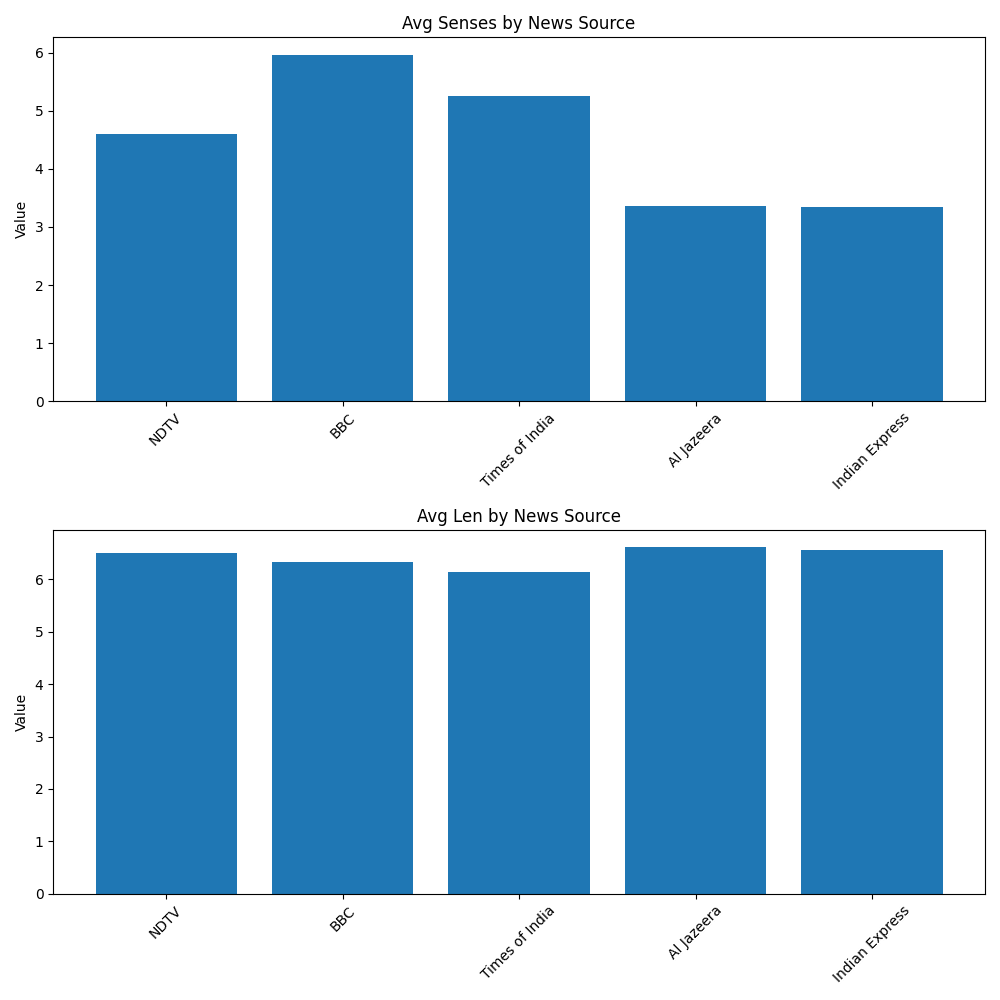

<div class="alert alert-block alert-info" >
<b style="font-size:150%">Question 1: <br><br>
b) Implement Lesk algorithm for Word Sense Disambiguation (WSD)</b>
</div>

In [45]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import re
import random

# Download required NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

class AdvancedLeskWSD:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.punctuation = set(string.punctuation)
        self.lemmatizer = nltk.WordNetLemmatizer()

    def tokenize_and_preprocess(self, text):
        tokens = word_tokenize(text.lower())
        return [self.lemmatizer.lemmatize(token) for token in tokens 
                if token not in self.stop_words and token not in self.punctuation]

    def get_sense_definitions(self, word):
        return {sense: self.tokenize_and_preprocess(sense.definition())
                for sense in wn.synsets(word)}

    def compute_overlap(self, context, sense_definition):
        return len(set(context) & set(sense_definition))

    def lesk_algorithm(self, word, context):
        best_sense = None
        max_overlap = 0
        sense_definitions = self.get_sense_definitions(word)

        for sense, definition in sense_definitions.items():
            overlap = self.compute_overlap(context, definition)
            if overlap > max_overlap:
                max_overlap = overlap
                best_sense = sense

        return best_sense

    def disambiguate_sentence(self, sentence, target_word):
        context = self.tokenize_and_preprocess(sentence)
        return self.lesk_algorithm(target_word, context)

    def generate_example_sentence(self, word, sense):
        examples = sense.examples()
        if examples:
            return random.choice(examples)
        else:
            return f"No example available for '{word}' in the sense of {sense.definition()}"

    def explain_disambiguation(self, word, sentence, sense):
        context = self.tokenize_and_preprocess(sentence)
        sense_def = self.tokenize_and_preprocess(sense.definition())
        overlap = set(context) & set(sense_def)
        
        explanation = f"The word '{word}' in the sentence:\n'{sentence}'\n"
        explanation += f"has been disambiguated to mean:\n{sense.definition()}\n\n"
        explanation += f"This sense was chosen because the following words appear in both the context and the sense definition:\n{', '.join(overlap)}"
        
        return explanation

class InteractiveWSD:
    def __init__(self):
        self.wsd = AdvancedLeskWSD()
        self.history = []

    def run(self):
        print("Welcome to the Interactive Word Sense Disambiguation Tool!")
        print("Enter a sentence and a target word, and I'll disambiguate it for you.")
        print("Type 'quit' to exit the program.")

        while True:
            sentence = input("\nEnter a sentence: ").strip()
            if sentence.lower() == 'quit':
                break

            target_word = input("Enter the target word to disambiguate: ").strip()
            if target_word.lower() == 'quit':
                break

            sense = self.wsd.disambiguate_sentence(sentence, target_word)

            if sense:
                print("\nDisambiguation Result:")
                print(self.wsd.explain_disambiguation(target_word, sentence, sense))
                
                example = self.wsd.generate_example_sentence(target_word, sense)
                print(f"\nExample usage: {example}")

                self.history.append((sentence, target_word, sense))

                print("\nWould you like to:")
                print("1. Try another sentence")
                print("2. View disambiguation history")
                print("3. Quit")

                choice = input("Enter your choice (1-3): ").strip()

                if choice == '2':
                    self.show_history()
                elif choice == '3':
                    break
            else:
                print(f"Sorry, I couldn't disambiguate '{target_word}' in the given context.")

        print("Thank you for using the Interactive WSD Tool!")

    def show_history(self):
        if not self.history:
            print("No disambiguation history available.")
            return

        print("\nDisambiguation History:")
        for i, (sentence, word, sense) in enumerate(self.history, 1):
            print(f"\n{i}. Sentence: {sentence}")
            print(f"   Word: {word}")
            print(f"   Sense: {sense.definition()}")

if __name__ == "__main__":
    interactive_wsd = InteractiveWSD()
    interactive_wsd.run()
    

[nltk_data] Downloading package wordnet to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Welcome to the Interactive Word Sense Disambiguation Tool!
Enter a sentence and a target word, and I'll disambiguate it for you.
Type 'quit' to exit the program.

Enter a sentence: The old man cast his line into the still water, hoping to land a big one. As he waited, he reflected on how he had to scale back his fishing trips since his wife passed. The thought left a bitter taste in his mouth. Suddenly, his rod bent double – he had a bite! As he reeled in his catch, a crowd began to gather on the bank. The fish's scales gleamed in the sun as he finally netted it. 'What a whopper!' someone exclaimed. The old man beamed, feeling like a star for a moment. This catch would definitely tip the scales in the local fishing competition
Enter the target word to disambiguate: star

Disambiguation Result:
The word 'star' in the sentence:
'The old man cast his line into the still water, hoping to land a big one. As he waited, he reflected on how he had to scale back his fishing trips since his wife